In [2]:
pdata = pd.read_excel('PMI diabetes.xlsx')

In [3]:
pdata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
pdata.isnull().values.any() 

False

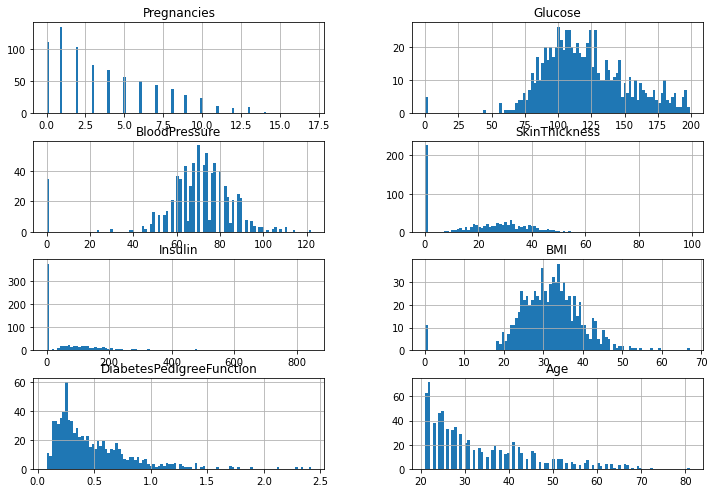

In [5]:
columns = list(pdata)[0:-1] 
pdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

#Identify Correlation in data

In [6]:
pdata.corr() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

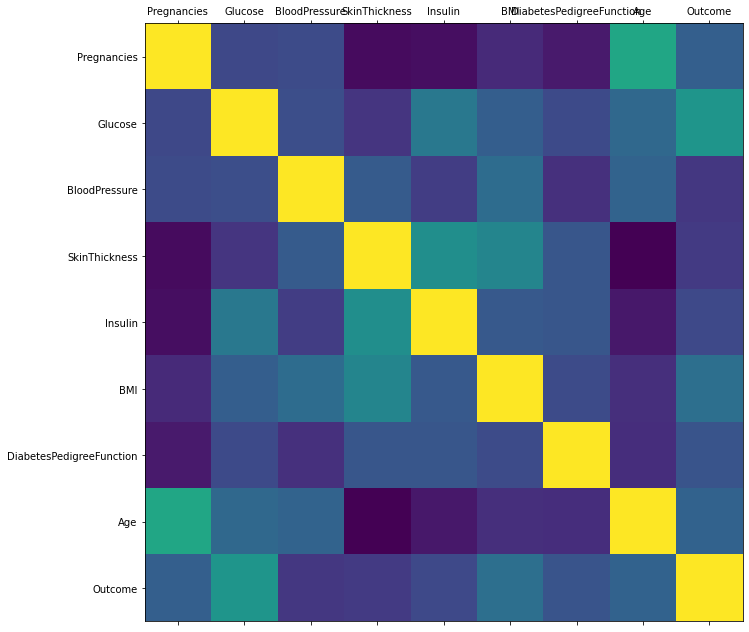

In [8]:
plot_corr(pdata)

Calculate diabetes ratio of True/False from outcome variable

In [9]:
n_true = len(pdata.loc[pdata['Outcome'] == True])
n_false = len(pdata.loc[pdata['Outcome'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


Spliting the data

In [10]:
from sklearn.model_selection import train_test_split

features_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class = ['Outcome']

X = pdata[features_cols].values      # Predictor feature columns (8 X m)
Y = pdata[predicted_class]. values   # Predicted class (1=True, 0=False) (1 X m)
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=split_test_size, random_state=52)

In [11]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

69.92% data is in training set
30.08% data is in test set


In [12]:
print("Original Diabetes True Values    : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Outcome'] == 1]), (len(pdata.loc[pdata['Outcome'] == 1])/len(pdata.index)) * 100))
print("Original Diabetes False Values   : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Outcome'] == 0]), (len(pdata.loc[pdata['Outcome'] == 0])/len(pdata.index)) * 100))
print("")
print("Training Diabetes True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Diabetes True Values    : 268 (34.90%)
Original Diabetes False Values   : 500 (65.10%)

Training Diabetes True Values    : 192 (35.75%)
Training Diabetes False Values   : 345 (64.25%)

Test Diabetes True Values        : 76 (32.90%)
Test Diabetes False Values       : 155 (67.10%)



Data Preparation

In [13]:
pdata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Train Naive Bayes algorithm

In [15]:
from sklearn.naive_bayes import GaussianNB # I am using Gaussian algorithm from Naive Bayes

# Lets creat the model
diab_model = GaussianNB()

diab_model.fit(x_train, y_train.ravel())

GaussianNB()

Performance of our model with training data

In [16]:
diab_train_predict = diab_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, diab_train_predict)))
print()

Model Accuracy: 0.7635



Performance of our model with testing data

In [17]:
diab_test_predict = diab_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, diab_test_predict)))
print()

Model Accuracy: 0.7446



Lets check the confusion matrix and classification report

In [18]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_test, diab_test_predict, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, diab_test_predict, labels=[1, 0]))

Confusion Matrix
[[ 49  27]
 [ 32 123]]

Classification Report
              precision    recall  f1-score   support

           1       0.60      0.64      0.62        76
           0       0.82      0.79      0.81       155

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.75      0.74      0.75       231



Random Forest Algorithm

In [19]:
from sklearn.ensemble import RandomForestClassifier
diab_rf_model = RandomForestClassifier(random_state=52)
diab_rf_model.fit(x_train, y_train.ravel())

RandomForestClassifier(random_state=52)

In [20]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=52, verbose=0, warm_start=False)

RandomForestClassifier(n_estimators=10, n_jobs=1, random_state=52)

Training data prediction

In [21]:
rf_train_predict = diab_rf_model.predict(x_train)
print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_train, rf_train_predict)))

Model Accuracy: 1.00


Testing data prediction

In [22]:
rf_test_predict = diab_rf_model.predict(x_test)
print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, rf_test_predict)))

Model Accuracy: 0.75


In [23]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, rf_test_predict, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_test_predict, labels=[1, 0]))

Confusion Matrix
[[ 45  31]
 [ 26 129]]

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.59      0.61        76
           0       0.81      0.83      0.82       155

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

diab_lr_model = LogisticRegression(C=0.7, random_state=52)
diab_lr_model.fit(x_train, y_train.ravel())
lr_test_predict = diab_lr_model.predict(x_test)

print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, lr_test_predict)))
print("")
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_test_predict, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_test_predict, labels=[1, 0]))

Model Accuracy: 0.77

Confusion Matrix
[[ 46  30]
 [ 24 131]]

Classification Report
              precision    recall  f1-score   support

           1       0.66      0.61      0.63        76
           0       0.81      0.85      0.83       155

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.77      0.76       231



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
